In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

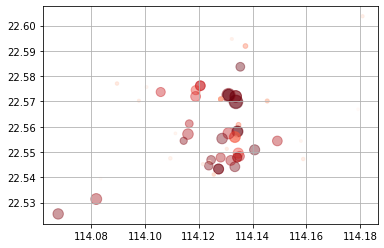

In [3]:
data = pd.read_csv('second_hand_ house.csv')
plt.scatter(data['经度'],data['纬度'],  # 按照经纬度显示
            s = data['房屋单价']/500,  # 按照单价显示大小
            c = data['参考总价'],  # 按照总价显示颜色
            alpha = 0.4, cmap = 'Reds')  
plt.grid()

In [6]:
print(data.dtypes)
print('-------\n数据长度为%i条' % len(data))
# data.head()
# 极差：max-min
# 只针对定量字段

def d_range(df,*cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.append(crange)
    return(krange)

# 创建函数求极差
key1 = '参考首付'
key2 = '参考总价'
dr = d_range(data,key1,key2)
print('%s极差为 %f \n%s极差为 %f' % (key1, dr[0], key2, dr[1]))

房屋编码      int64
小区       object
朝向       object
房屋单价      int64
参考首付    float64
参考总价    float64
经度      float64
纬度      float64
dtype: object
-------
数据长度为75条
参考首付极差为 52.500000 
参考总价极差为 175.000000


<AxesSubplot:>

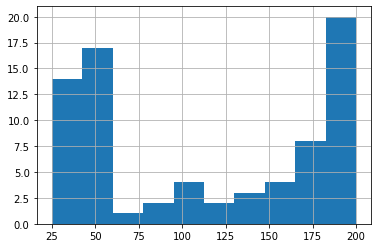

In [7]:
data[key2].hist(bins=10)

In [9]:
# 频率分布情况 - 定量字段
# ② 求出分组区间
gcut = pd.cut(data[key2],10,right=False)
gcut_count = gcut.value_counts(sort=False)  # 不排序
data['%s分组区间' % key2] = gcut.values
print(gcut.head(),'\n------')
print(gcut_count)
# data.head()
# pd.cut(x, bins, right)：按照组数对x分组，且返回一个和x同样长度的分组dataframe，right → 是否右边包含，默认True
# 通过groupby查看不同组的数据频率分布
# 给源数据data添加“分组区间”列

0      [42.5, 60.0)
1      [25.0, 42.5)
2      [42.5, 60.0)
3      [25.0, 42.5)
4    [165.0, 182.5)
Name: 参考总价, dtype: category
Categories (10, interval[float64]): [[25.0, 42.5) < [42.5, 60.0) < [60.0, 77.5) < [77.5, 95.0) ... [130.0, 147.5) < [147.5, 165.0) < [165.0, 182.5) < [182.5, 200.175)] 
------
[25.0, 42.5)        14
[42.5, 60.0)        17
[60.0, 77.5)         1
[77.5, 95.0)         2
[95.0, 112.5)        4
[112.5, 130.0)       2
[130.0, 147.5)       3
[147.5, 165.0)       4
[165.0, 182.5)       8
[182.5, 200.175)    20
Name: 参考总价, dtype: int64


In [10]:
# 频率分布情况 - 定量字段
# ③  求出目标字段下频率分布的其他统计量 → 频数，频率，累计频率

r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns ={gcut_count.name:'频数'}, inplace = True)  # 修改频数字段名
r_zj['频率'] = r_zj / r_zj['频数'].sum()  # 计算频率
r_zj['累计频率'] = r_zj['频率'].cumsum()  # 计算累计频率
r_zj['频率%'] = r_zj['频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示频率
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示累计频率
r_zj.style.bar(subset=['频率','累计频率'], color='green',width=100)

,频数,频率,累计频率,频率%,累计频率%
"[25.0, 42.5)",14,0.186667,0.186667,18.67%,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%,41.33%
"[60.0, 77.5)",1,0.013333,0.426667,1.33%,42.67%
"[77.5, 95.0)",2,0.026667,0.453333,2.67%,45.33%
"[95.0, 112.5)",4,0.053333,0.506667,5.33%,50.67%
"[112.5, 130.0)",2,0.026667,0.533333,2.67%,53.33%
"[130.0, 147.5)",3,0.040000,0.573333,4.00%,57.33%
"[147.5, 165.0)",4,0.053333,0.626667,5.33%,62.67%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%,73.33%
"[182.5, 200.175)",20,0.266667,1.000000,26.67%,100.00%
